Setup and train a simple deep NN on the CFIR
-----

CIFAR10 small image classification

![](https://kaggle2.blob.core.windows.net/competitions/kaggle/3649/media/cifar-10.png)

[Learn more here](https://www.kaggle.com/c/cifar-10)  
[Based on this code](https://github.com/fchollet/keras/blob/master/examples/cifar10_cnn.py)

In [79]:
reset -fs

In [80]:
import keras

----
Prepare data
----

In [81]:
from keras.datasets import cifar10

In [82]:
# TODO: Setup train and test splits


In [ ]:
assert x_train.shape == (50000, 32, 32, 3)
assert x_test.shape  == (10000, 32, 32, 3)
assert y_train.shape == (50000, 1)
assert y_test.shape  == (10000, 1)

In [86]:
# TODO: Convert class vectors to binary class matrices
num_classes = 10
y_train = None
y_test = None

In [ ]:
assert y_train[0][0] == 0
assert y_test[0][0] == 0

----
Take a look at the data
----

In [1]:
from matplotlib import pyplot as plt
from scipy.misc import toimage

%matplotlib inline

NameError: name 'x_train' is not defined

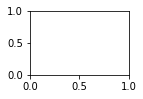

In [2]:
# Create a grid of 3x3 images
for i in range(0, 9):
    plt.subplot(330 + 1 + i)
    plt.imshow(toimage(x_train[i]))
    
plt.show()    

In [85]:
img_channels = 3 # The CIFAR10 images are RGB

---
Munge data
----

In [87]:
# Normalize inputs from 0-255 to 0.0-1.0
x_train = x_train.astype('float32')
x_train = x_train / 255.0

x_test = x_test.astype('float32')
x_test = x_test / 255.0

For simplicity, we also convert the images into the grayscale. We use the [Luma coding](https://en.wikipedia.org/wiki/Grayscale#Luma_coding_in_video_systems) that is common in video systems:

[Source](http://www.cs.nthu.edu.tw/~shwu/courses/ml/labs/11_NN_Regularization/11_NN_Regularization.html)

In [88]:
import numpy as np

In [89]:
def grayscale(data, dtype='float32'):
    # luma coding weighted average in video systems
    r, g, b = np.asarray(.3, dtype=dtype), np.asarray(.59, dtype=dtype), np.asarray(.11, dtype=dtype)
    rst = r * data[:, :, :, 0] + g * data[:, :, :, 1] + b * data[:, :, :, 2]
    # add channel dimension
    rst = np.expand_dims(rst, axis=3)
    return rst

In [90]:
x_train_gray = grayscale(x_train)
x_test_gray = grayscale(x_test)

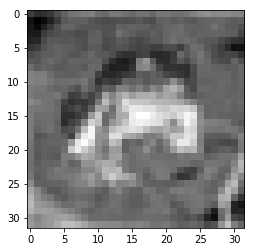

In [91]:
# Create a grid of 3x3 images
img = 0 
plt.imshow(x_train_gray[img, :, :, 0], 
           cmap=plt.get_cmap('gray'), 
           interpolation='none')
    
plt.show()  

In [92]:
img_channels = 1 # now we have only one channel in the images

# However it is more puddle than frog 🐸. Let's how a nonlinearities work!

In [93]:
img_rows, img_cols = 32, 32 # Input image dimensions
image_size = img_rows *  img_cols

In [94]:
# Transform from matrix to vector
x_train_gray = None
x_test_gray = None

In [ ]:
assert x_train_gray.shape == (50000, 1024)
assert x_test_gray.shape == (10000,  1024)

----
Define architecture
-----

In [95]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

In [96]:
# TODO: Define model
model = None

In [97]:
# TODO: Define input layer
layer_input = None

model.add(layer_input)

In [98]:
# TODO: Define output layers
layer_output = None
model.add(layer_output)

In [99]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 512)               524800    
_________________________________________________________________
dense_10 (Dense)             (None, 10)                5130      
Total params: 529,930.0
Trainable params: 529,930
Non-trainable params: 0.0
_________________________________________________________________


In [100]:
from keras.optimizers import SGD

In [101]:
# TODO: Compile model
model.compile(None)

----
Train model
-----

In [110]:
batch_size = 128
epochs = 0 # Let's limit it to 5

In [111]:
history = model.fit(x_train_gray, 
                    y_train,
                    batch_size=batch_size, 
                    epochs=epochs,
                    verbose=True, 
                    validation_data=(x_test_gray, y_test))

Train on 50000 samples, validate on 10000 samples
Epoch 1/5
50000/50000 [==============================] - 2s - loss: 2.2580 - acc: 0.1791 - val_loss: 2.2116 - val_acc: 0.2190

In [112]:
score = model.evaluate(x_test_gray, 
                       y_test, 
                       verbose=True)

 9824/10000 [============================>.] - ETA: 0s

In [113]:
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 2.09778436394
Test accuracy: 0.262


How good is your model after 0 training epochs?

Why would we just want to run a model with 0 training epochs?

How good is your model after 1 training epochs?

How good is your model after 5 training epochs?